### Student Performance Indicator 

<b>Life cycle of a Machine Learning Project </b>

* Understanding the Problem Statement 
* Data Collection 
* Data Checks to perform 
* Exploratory Data Analysis 
* Data Pre-Processing 
* Model Training 
* Choose Best model 

#### 1: Problem Statement 
* This project understands how the student's performance (test scores) is affected by other variables such as Gender , Ethnicity , Parental Level of Education , Lunch and Test Preparation Course 

#### 2: Data Collection  
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

##### 2.1 Import Data and Required Packages 

<b>Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library</b>


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

<b>Import the CSV Data as Pandas DataFrame</b>

In [2]:
df = pd.read_csv("data/stud.csv")

<b>Show Top 5 Records</b>

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<b>Shape of the Dataset</b>

In [4]:
df.shape

(1000, 8)

##### 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score
#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<b>There are no missing values in the dataset</b>

##### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

<b>There are no duplicate values in the dataset </b>

##### 3.2 Check Data Types 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Checking the number of unique values of each column 

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5 Check Statistics of the data set 

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<b>Insight</b>

* All means are close to each other 
* All Standard Deviations are also close to each other 
* Minimum scores are different for each subject , with Maths having a 0

##### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# Various categories present in different categorical columns 
print(f"Categories in 'gender' variable:     {df['gender'].unique()}")
print(f"Categories in 'race_ethnicity' variable:     {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental_level_of_education' variable:     {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' variable:     {df['lunch'].unique()}")
print(f"Categories in 'test_preparation_course' variable:     {df['test_preparation_course'].unique()}")

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:     ['none' 'completed']


In [17]:
# define numerical and categorical columns 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

# print columns 
print(f'We have {len(numeric_features)} numerical features which are : {numeric_features}.')
print(f'We have {len(categorical_features)} categorical features which are : {categorical_features}.')

We have 3 numerical features which are : ['math_score', 'reading_score', 'writing_score'].
We have 5 categorical features which are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'].


In [18]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


##### 3.8 Adding columns for Total Score and Average

In [19]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score'] / 3 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]

print(f"Number of students with full marks in Maths : {math_full}")
print(f"Number of students with full marks in Writing : {writing_full}")
print(f"Number of students with full marks in Reading : {reading_full}")


Number of students with full marks in Maths : 7
Number of students with full marks in Writing : 14
Number of students with full marks in Reading : 17


In [40]:
reading_less_20 = df[df['reading_score'] <= 20].shape[0]
writing_less_20 = df[df['writing_score'] <= 20].shape[0]
math_less_20 = df[df['math_score'] <= 20].shape[0]

print(f"Number of students with <=20 marks in Writing : {writing_less_20}")
print(f"Number of students with <=20 marks in Maths : {math_less_20}")
print(f"Number of students with <=20 marks in Reading : {reading_less_20}")


Number of students with <=20 marks in Writing : 3
Number of students with <=20 marks in Maths : 4
Number of students with <=20 marks in Reading : 1


<b>Insights</b>

* Students performed worst in Maths 
* Best performance in Reading section

#### 4. Exploring Data (Visualisation)
##### 4.1 Visualise average score distribution to make some conclusion

* Histogram
* Kernel Distribution Function (KDE)

<b> 4.1.1 Histogram and KDE</b>

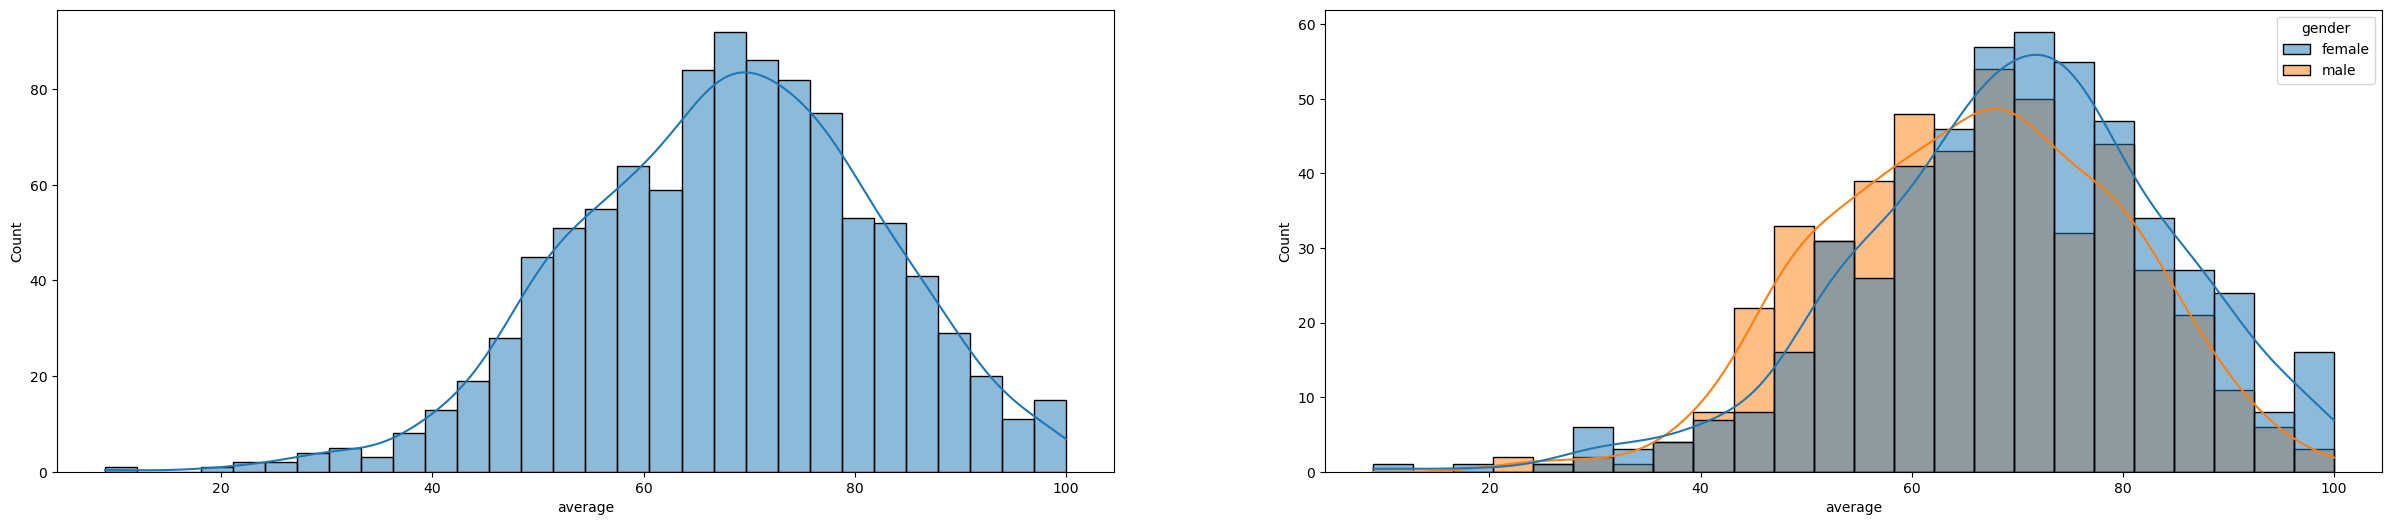

In [157]:
fig, axes = plt.subplots(1, 2, figsize=[30, 6])
plt.subplot(1,2,1)
sns.histplot(data=df, x='average', bins=30, kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

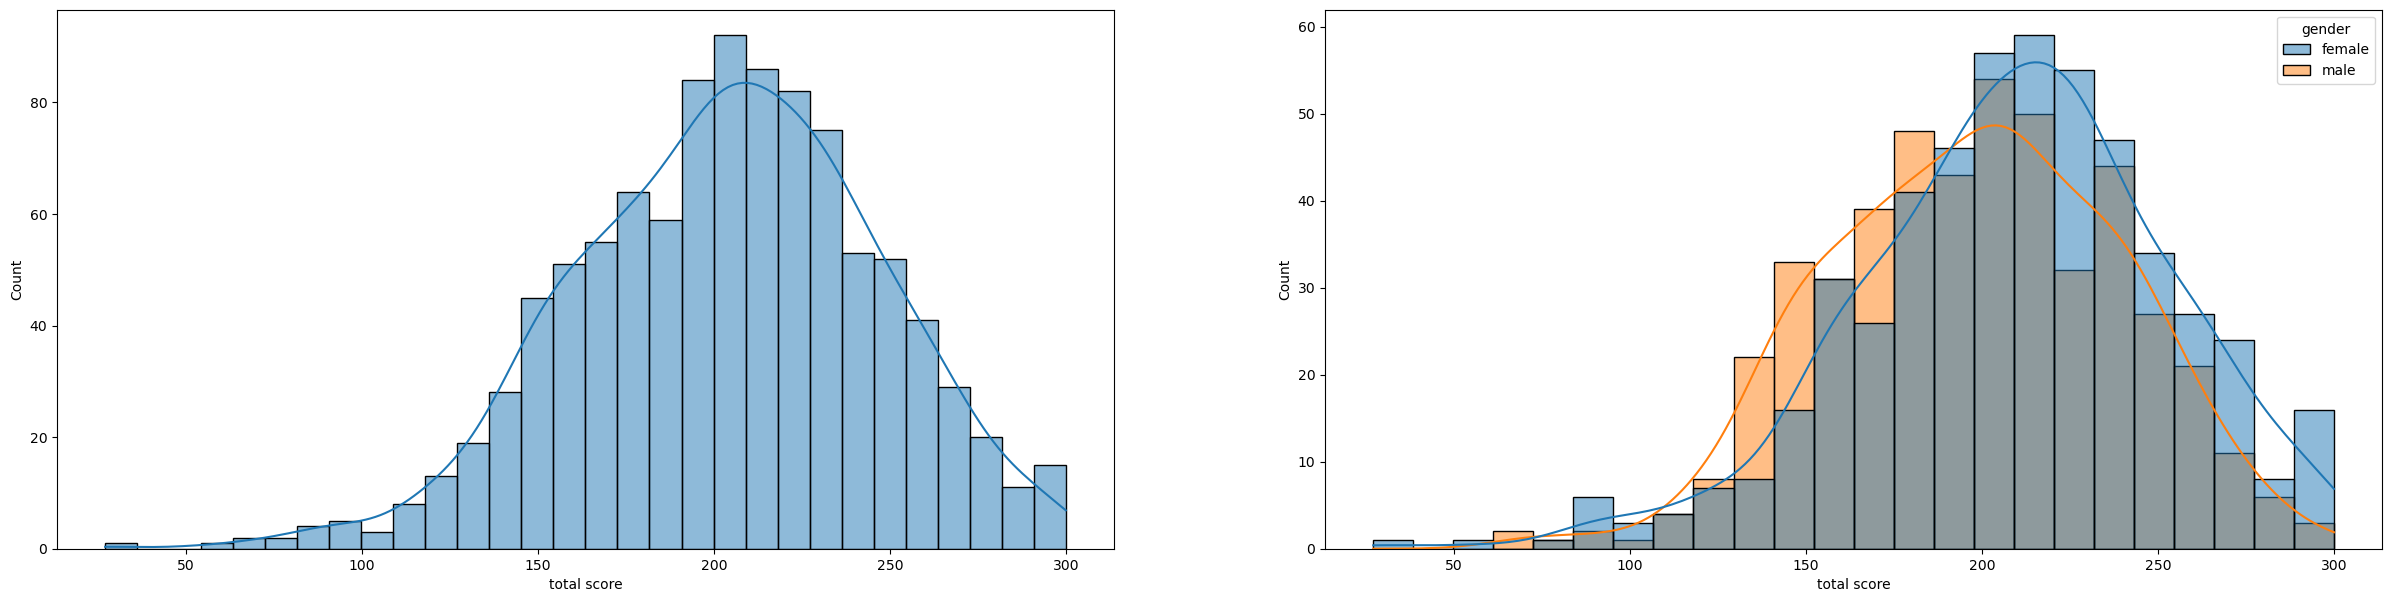

In [156]:
fig, axes = plt.subplots(1, 2, figsize=[30, 7])
plt.subplot(1,2,1)
sns.histplot(data=df, x='total score', bins=30, kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

<b> Insights </b>

* Female students tend to perform better than male students .

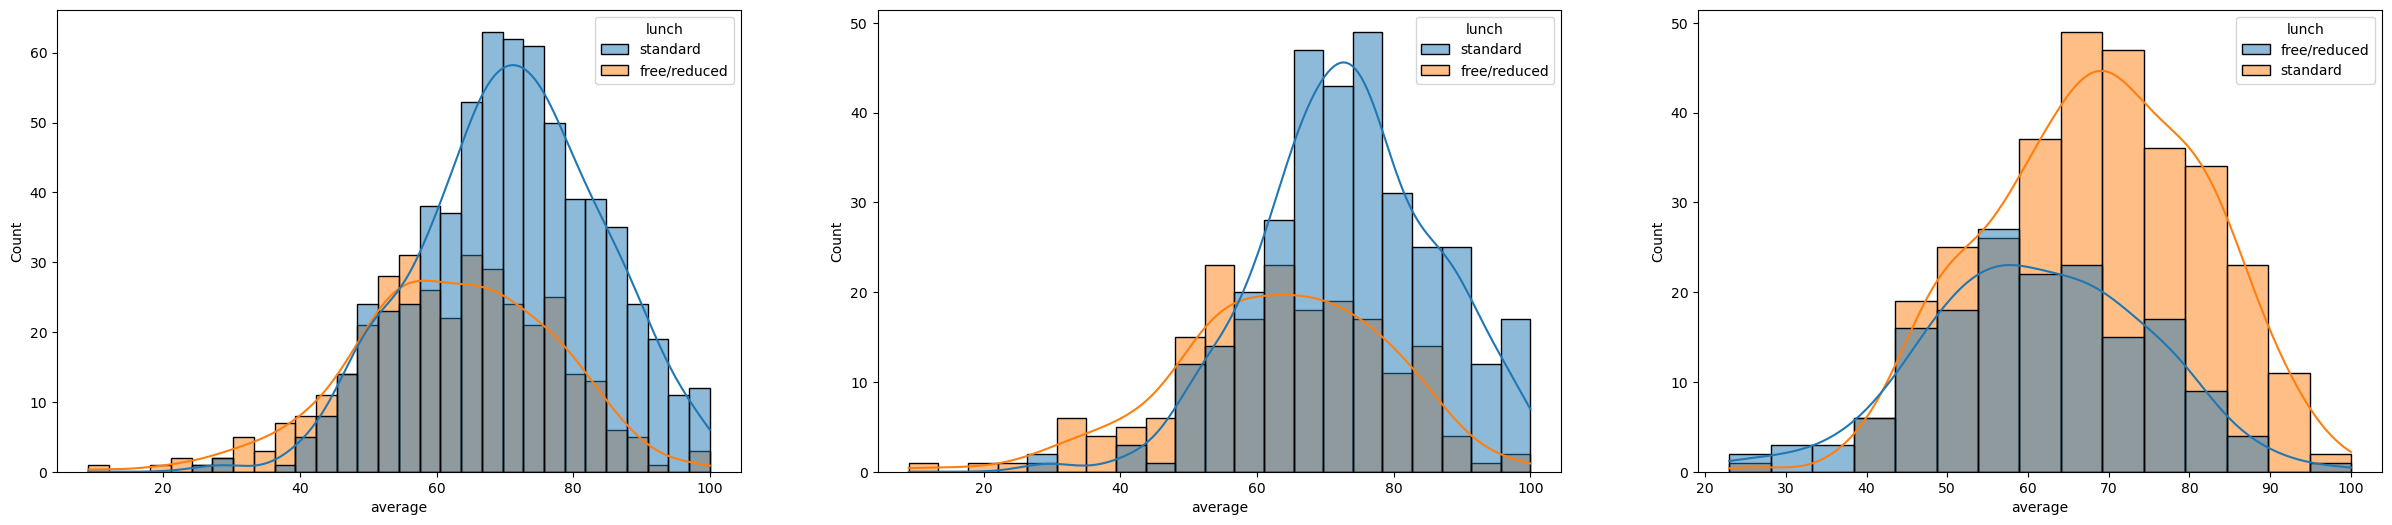

In [155]:
fig, axes = plt.subplots(1, 3, figsize=[30, 6])
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.show()

<b>Insights</b>

* Standard lunch helps perform better in exams
* Standard lunch helps performance regardless of gender

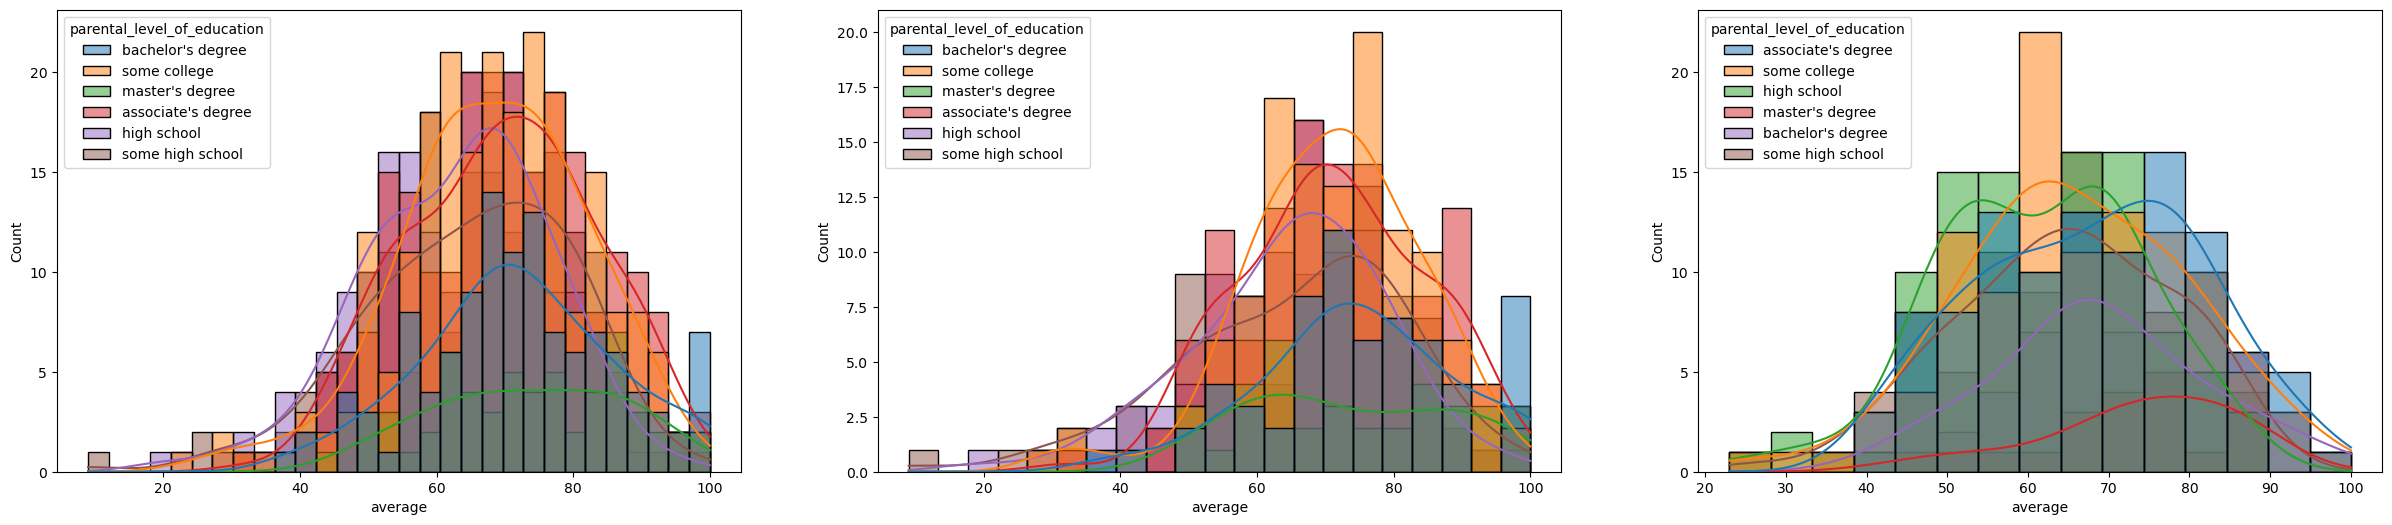

In [153]:
fig, axes = plt.subplots(1, 3, figsize=[30, 6])
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

<b>Insights</b>

* In general , parents education doesn't influence students scores 
* 2nd plot -> parents of male students with 'associate's degree' or 'master's degree' , the students perform well in exam 
* 3rd plot -> doesn't influence female students scores

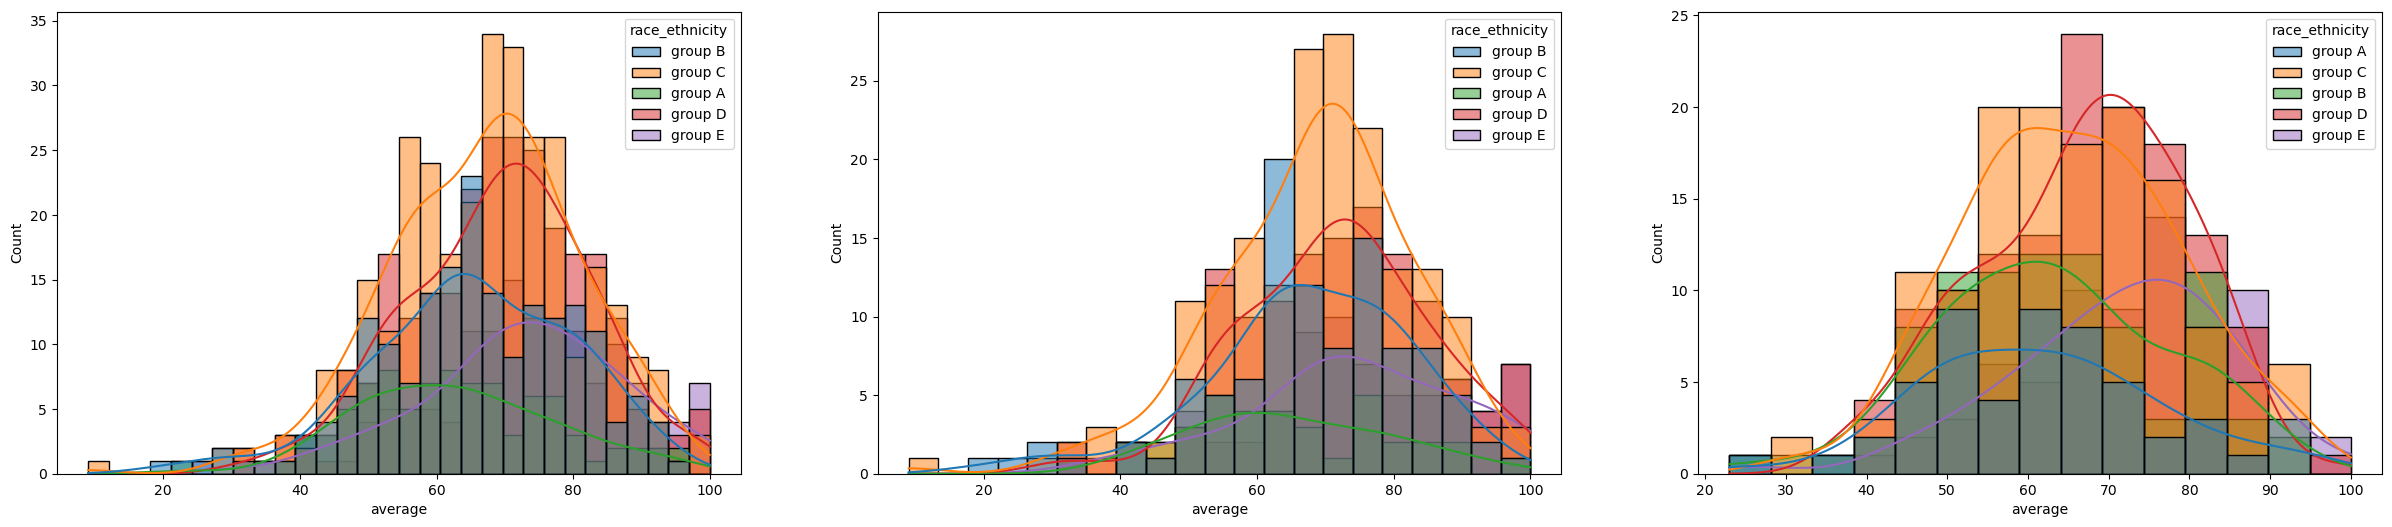

In [152]:
fig, axes = plt.subplots(1, 3, figsize=[30, 6])
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

<b>Insights</b>

* Students of Group A and Group B tend to perform poorly (regardless of male or female students)

##### 4.2 Maximum score of students in all three subjects

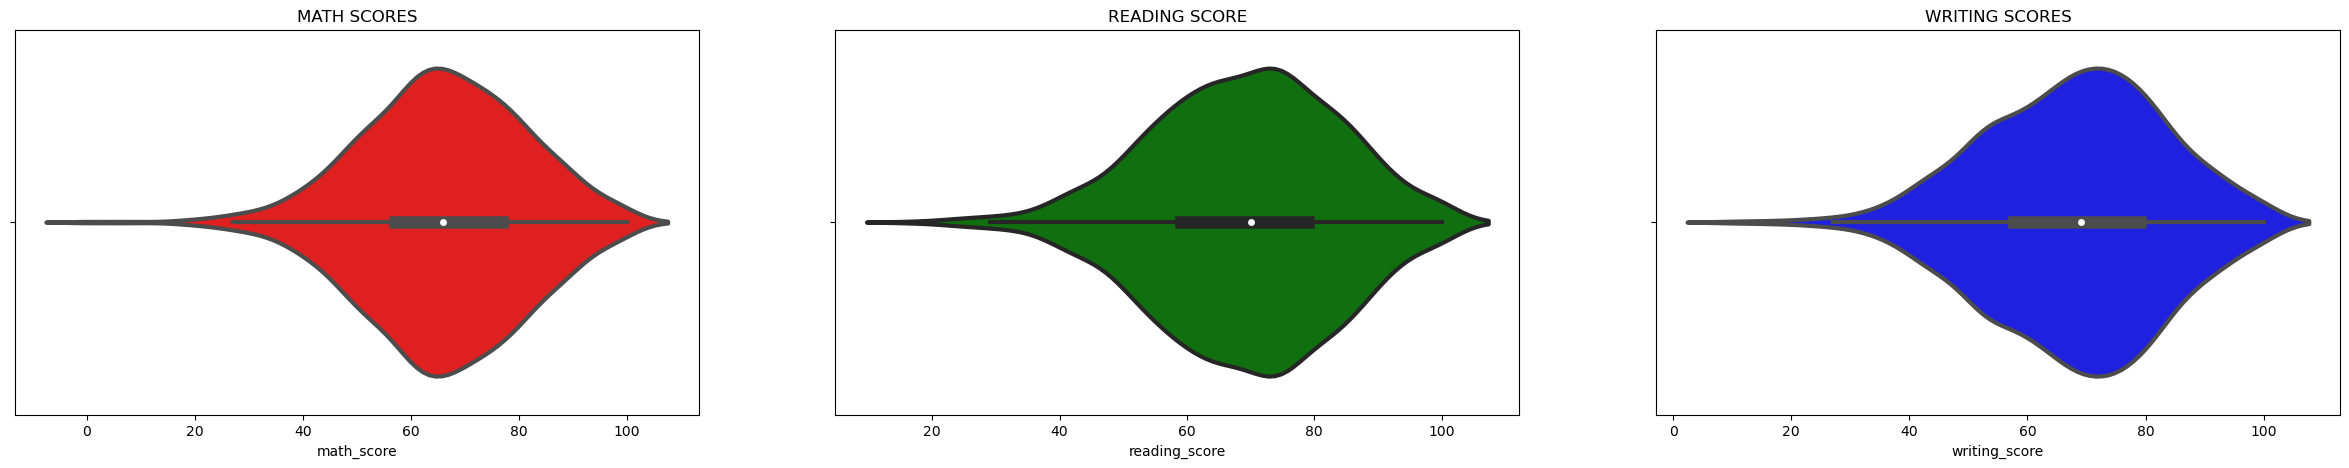

In [151]:
fig, axes = plt.subplots(1, 3, figsize=[30, 5])
plt.subplot(1,3,1)
plt.title("MATH SCORES")
sns.violinplot(data=df, x='math_score', color='red', linewidth=3)
plt.subplot(1,3,2)
plt.title("READING SCORE")
sns.violinplot(data=df, x='reading_score', color='green', linewidth=3)
plt.subplot(1,3,3)
plt.title("WRITING SCORES")
sns.violinplot(data=df, x='writing_score', color='blue', linewidth=3)
plt.show()

<b>Insights</b>

* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 4.3 Multivariate Analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

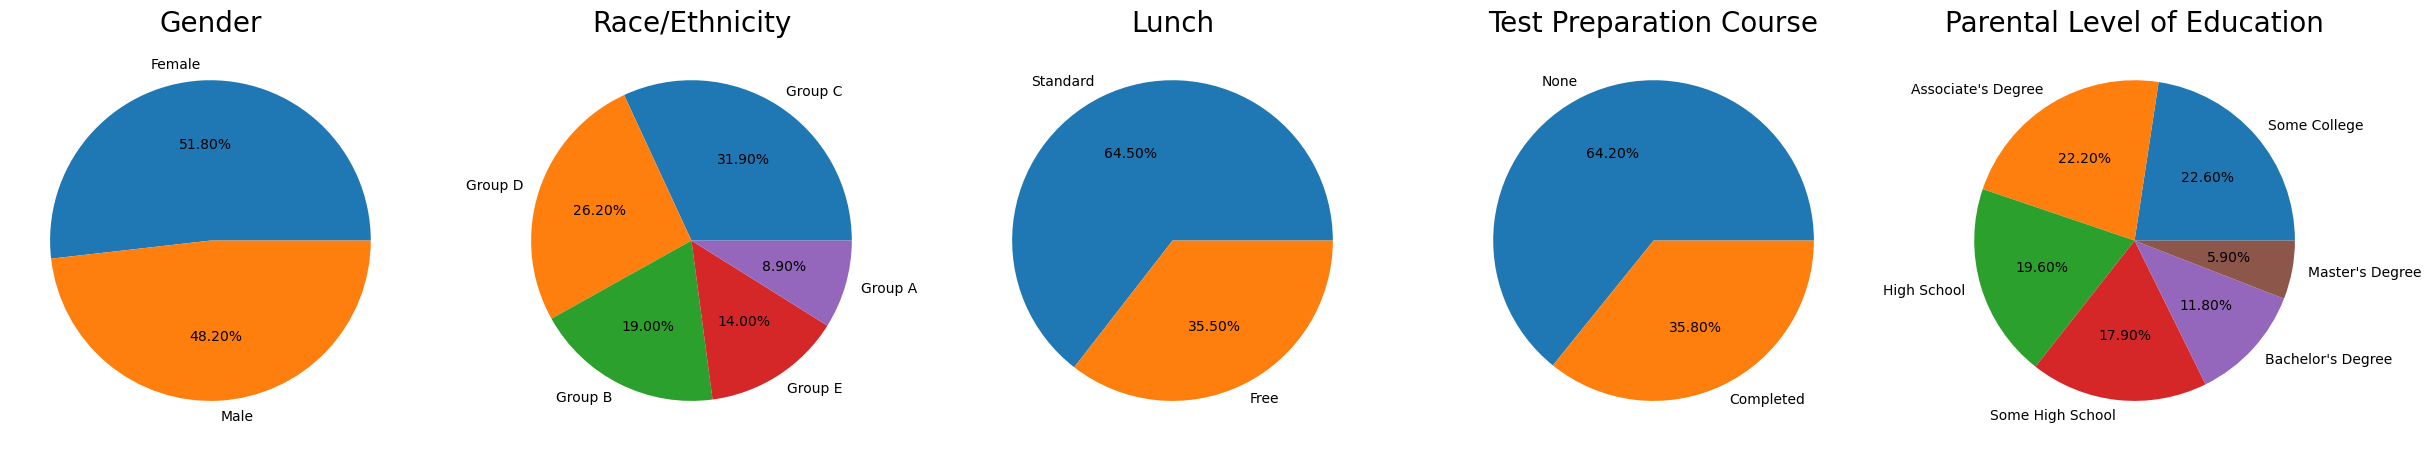

In [66]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'

plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title("Gender", fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A',

plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title("Race/Ethnicity", fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free' 

plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title("Lunch", fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'

plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title("Test Preparation Course", fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"

plt.pie(size, labels=labels, autopct='%.2f%%')
plt.title("Parental Level of Education", fontsize=20)
plt.axis("off")


<b>Insights</b>

* Number of Male and Female students are almost identical 
* Number of students are greatest in Group C
* Students having standard lunch is greater
* Students not enrolled in any test preparation course is greater 
* Parental education for students is greatest for "Some College" , closely followed by "Associate's Degree"

##### 4.4 Feature Wise Visualisation
<b>4.4.1</b> GENDER COLUMN 

* How is the distribution of Gender ? 
* Does gender have any impact on a Students performance ? 

<b>Univariate Analysis (How is the distribution of Gender ?)</b>

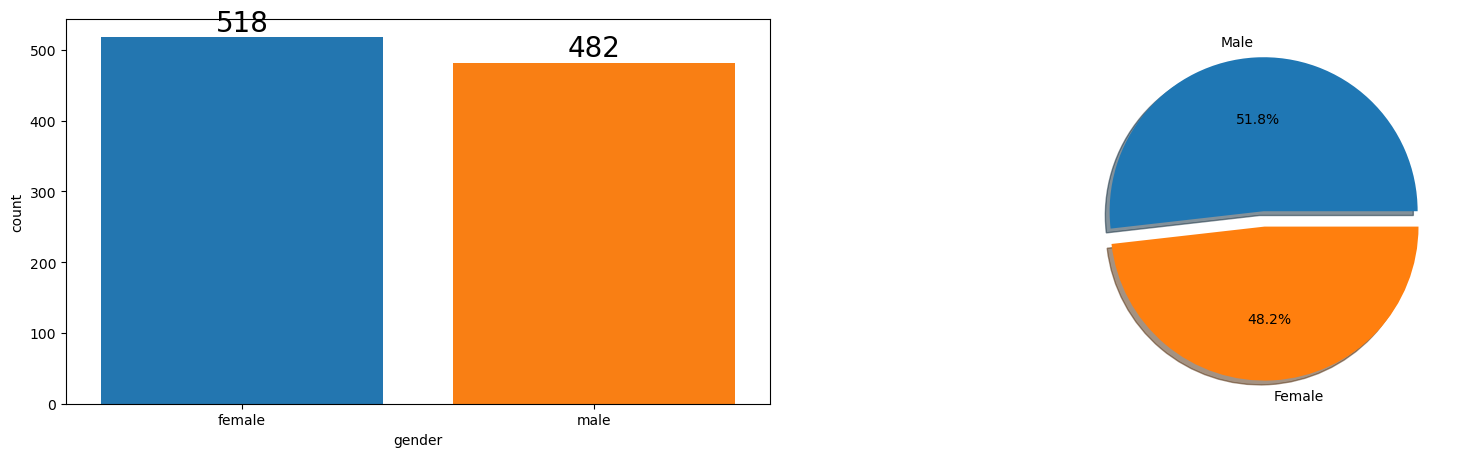

In [171]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(data=df, x=df['gender'], ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
# plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
plt.show()

<b>Insights</b>

* Gender distribution is balanced 

<b>Bivariate Analysis (Does gender have any influence on a Student's Performance ?)</b>

In [92]:
gender_group = df.groupby('gender')[['average','math_score']].mean()
gender_group

,average,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


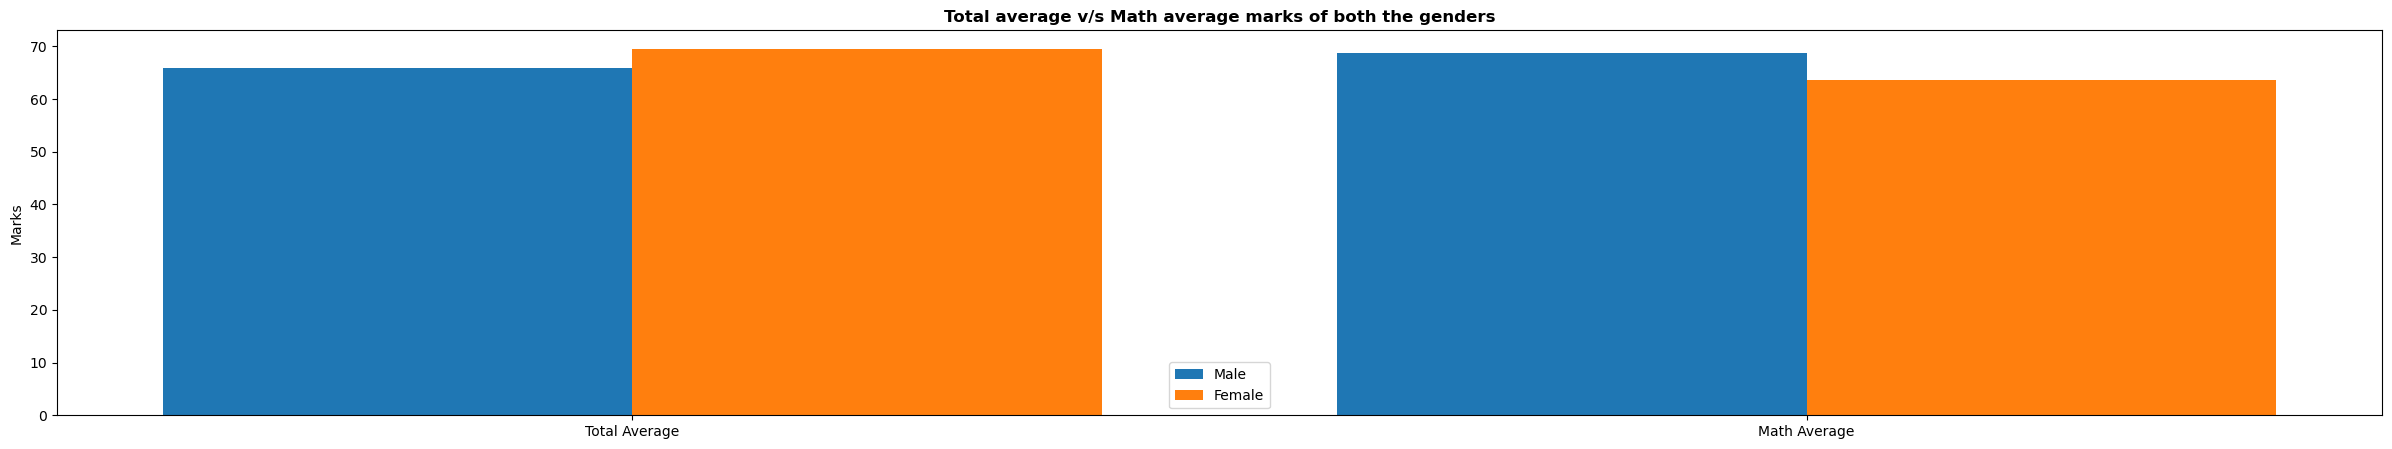

In [159]:
plt.figure(figsize=(30,5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

<b>Insights</b>

* On an average females have a better overall score than men 
* Whereas , males tend to score better in maths than females

<b>4.4.2 RACE/ETHNICITY COLUMN</b>

* How is the Group wise distribution ? 
* Does Race / Ethnicity have any impact on a students scores ? 

<b> Univariate Analysis (Distribution of the educational backgrounds of the students parents)

In [128]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

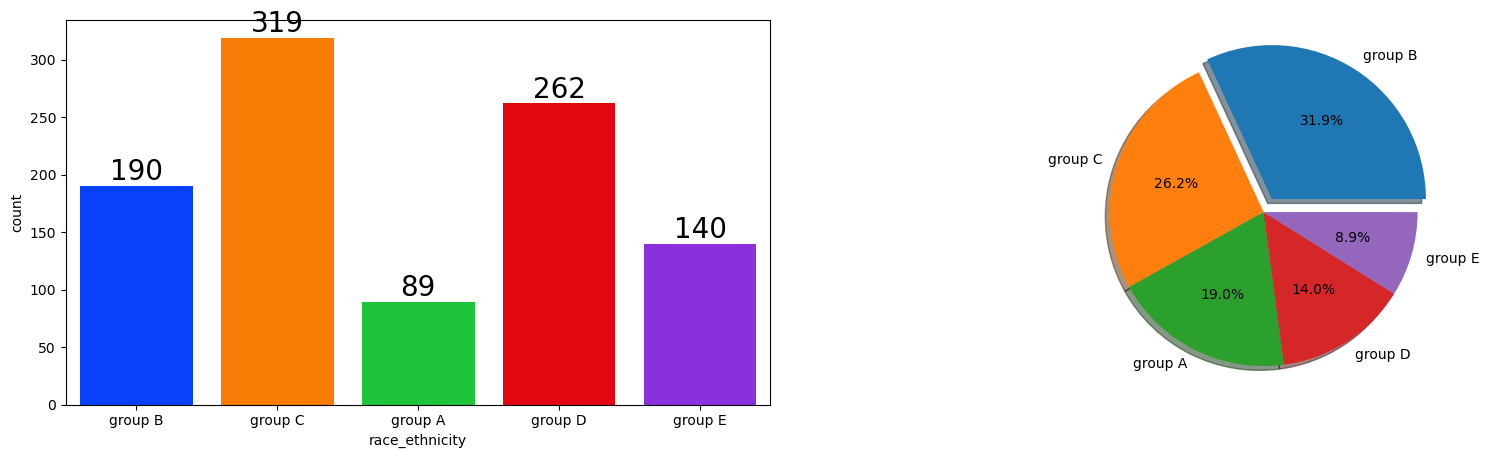

In [170]:
f, ax = plt.subplots(1, 2, figsize=[20, 5])
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].unique(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

<b> Bivariate Analysis (Does Race/Ethnicity have any impact on a student's performance ?)

In [97]:
group_data_2 = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()
group_data_2

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


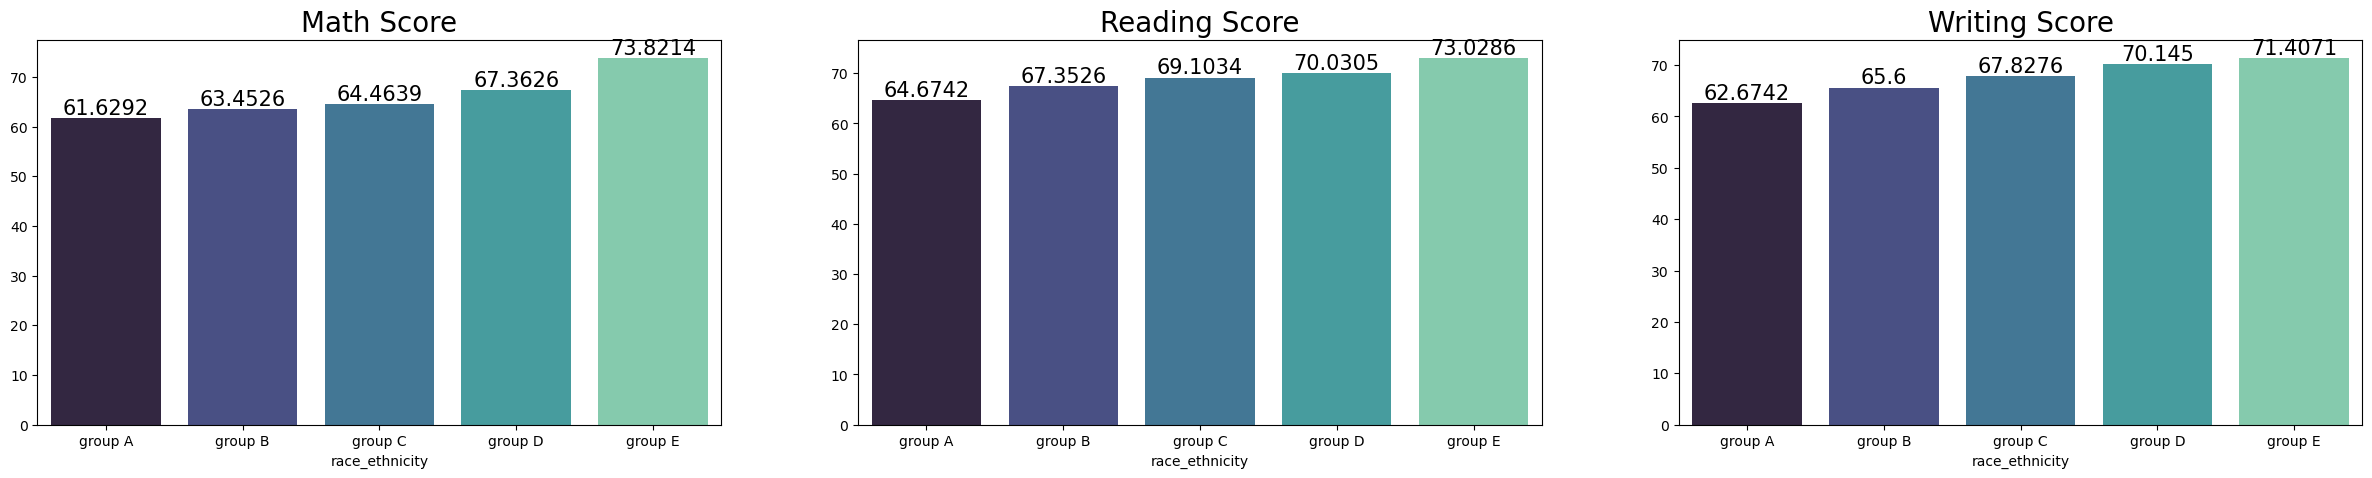

In [146]:
f, ax = plt.subplots(1, 3, figsize=[30, 5])
3
sns.barplot(x=group_data_2['math_score'].index,y=group_data_2['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title("Math Score", size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_2['reading_score'].index,y=group_data_2['reading_score'].values,palette = 'mako',ax=ax[1])
ax[1].set_title("Reading Score", size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_2['writing_score'].index,y=group_data_2['writing_score'].values,palette = 'mako',ax=ax[2])
ax[2].set_title("Writing Score", size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)
plt.show()

<b>Insights</b>

* Group E students score the highest across all subjects
* Group A students score the lowest across all subjects 

<b>4.4.3 Parental Level of Education </b>

* How are the educational background of the students parents distributed ? 
* Does parental education have any impact on a student's performance ? 

<b> Univariate Analysis (Distribution of the educational backgrounds of the students parents)

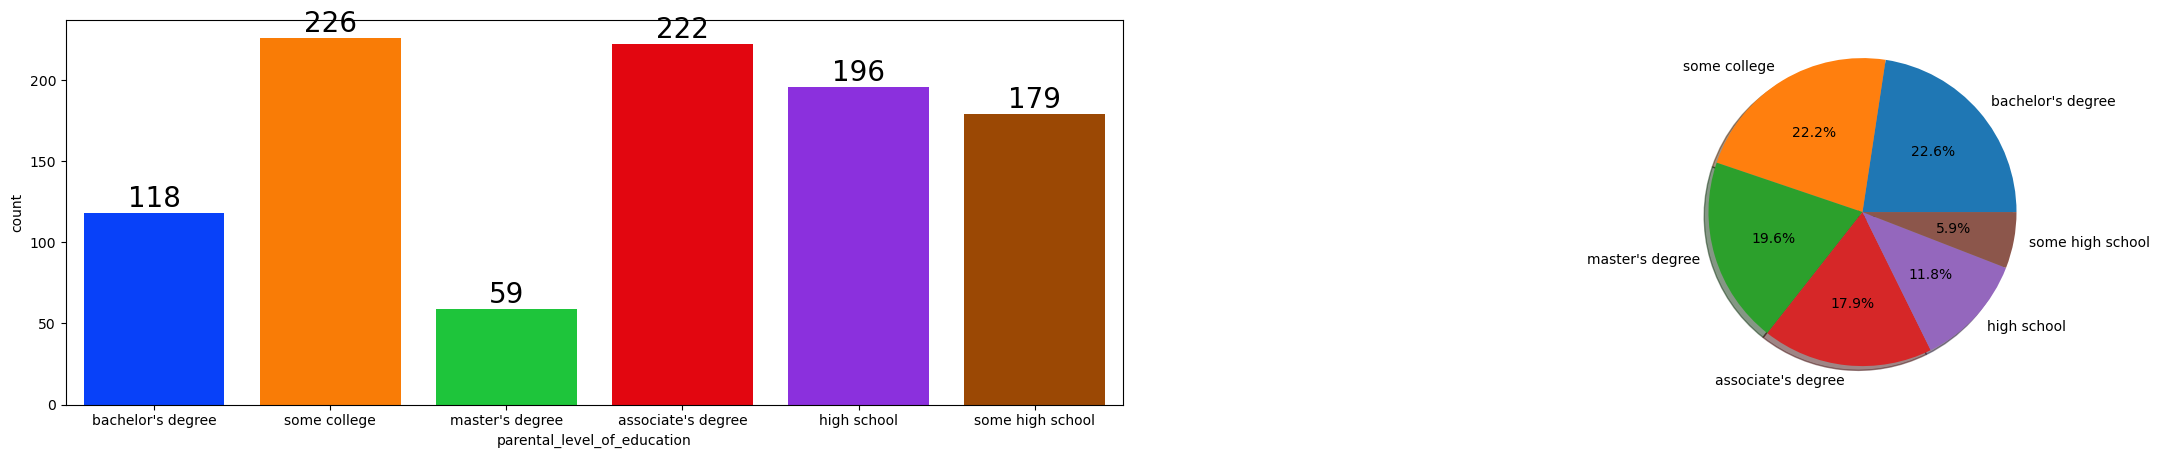

In [169]:
f, ax = plt.subplots(1, 2, figsize=[30, 5])
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x = df['parental_level_of_education'].value_counts(),labels=df['parental_level_of_education'].unique(),autopct='%1.1f%%',shadow=True)
plt.show()

In [137]:
group_data_3 = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
group_data_3

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


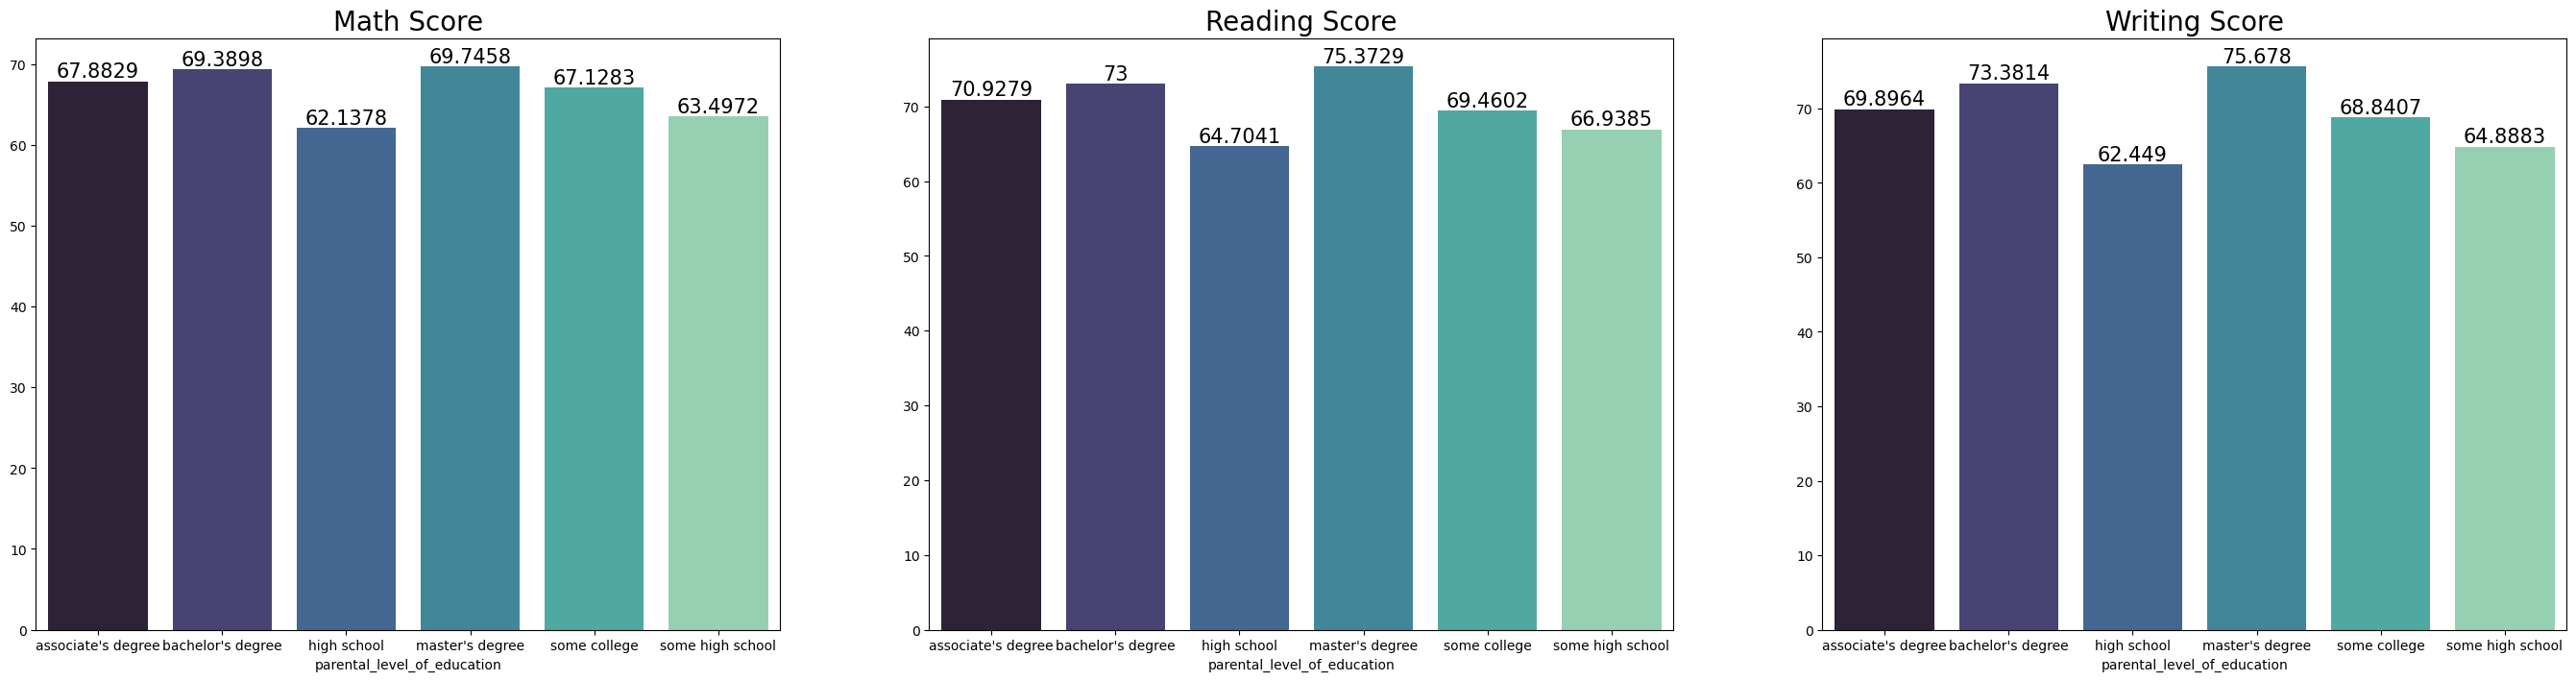

In [165]:
f, ax = plt.subplots(1, 3, figsize=[34, 8])

sns.barplot(x=group_data_3['math_score'].index,y=group_data_3['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title("Math Score", size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_3['reading_score'].index,y=group_data_3['reading_score'].values,palette = 'mako',ax=ax[1])
ax[1].set_title("Reading Score", size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_3['writing_score'].index,y=group_data_3['writing_score'].values,palette = 'mako',ax=ax[2])
ax[2].set_title("Writing Score", size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)
plt.show()

<b>Insights</b>

* Trend does not show any difference in childrens scores based on their parents education 
* Children whose parents have a Master's degree showcase higher scores 

<b>4.4.4 Lunch Column </b>

* What type of lunch is most common among students ?
* What is the effect of lunch type on test results ? 

<b>Univariate Analysis (Most common lunch type ?) </b>

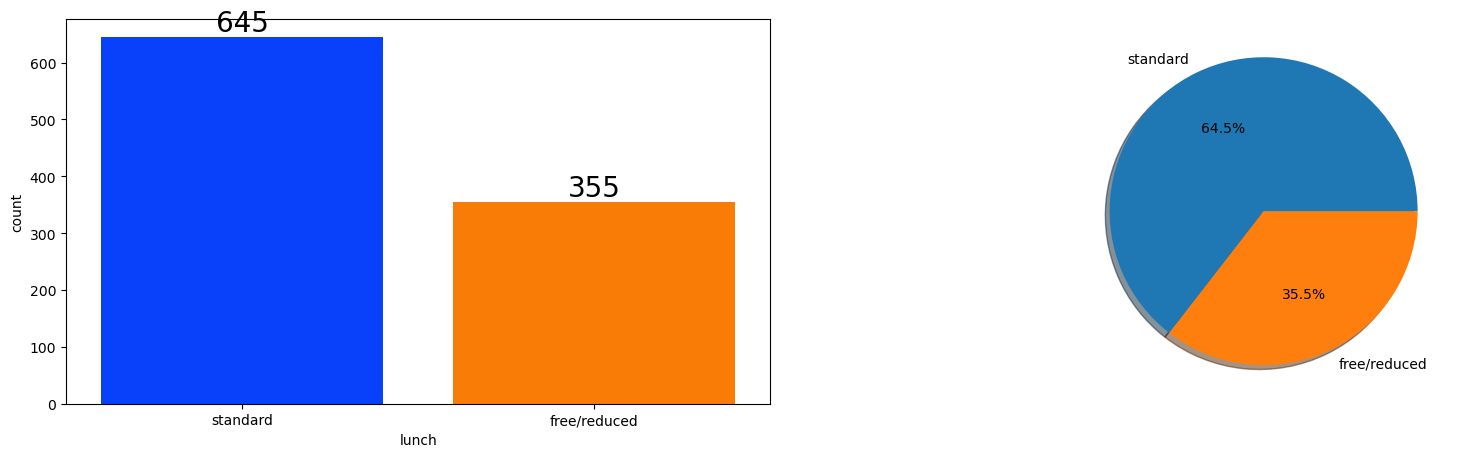

In [167]:
f, ax = plt.subplots(1, 2, figsize=[20, 5])
sns.countplot(x=df['lunch'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x = df['lunch'].value_counts(),labels=df['lunch'].unique(),autopct='%1.1f%%',shadow=True)
plt.show()

<b>Insights</b>

* Standard lunch was served more than free lunch

<b>Bivariate Analysis (Effect of type of lunch on test results ?)</b>

In [173]:
group_data_4 = df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()
group_data_4

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


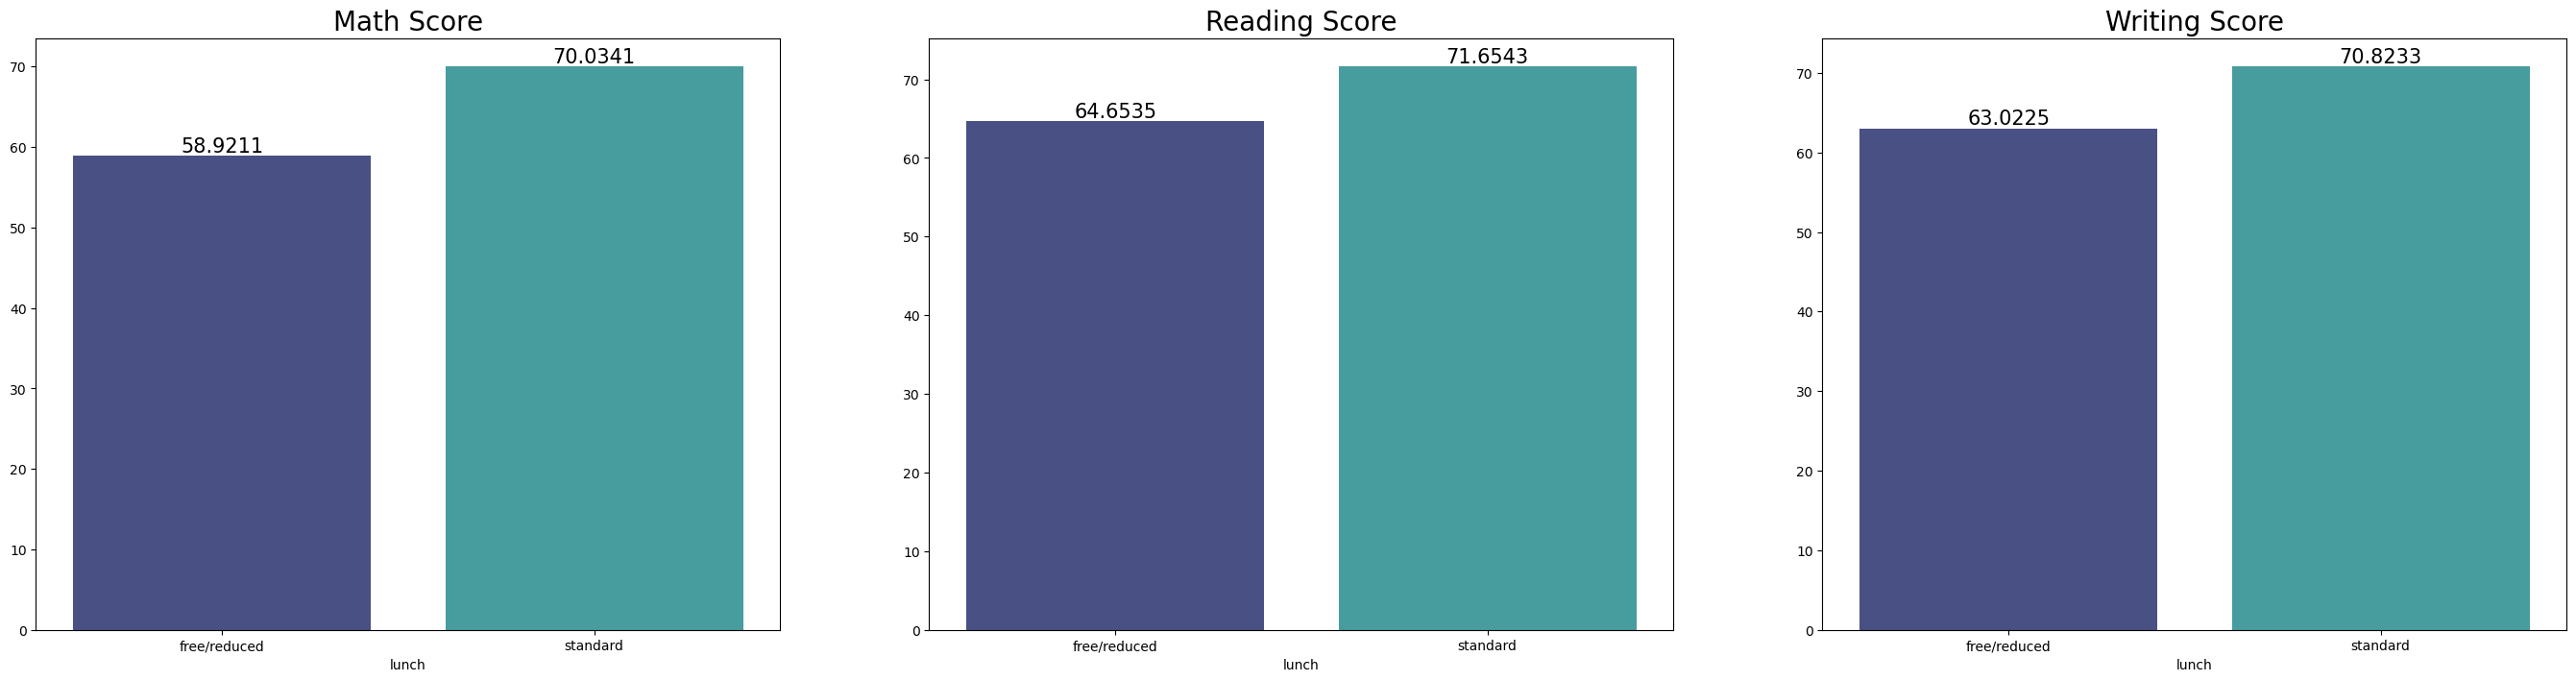

In [174]:
f, ax = plt.subplots(1, 3, figsize=[34, 8])

sns.barplot(x=group_data_4['math_score'].index,y=group_data_4['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title("Math Score", size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_4['reading_score'].index,y=group_data_4['reading_score'].values,palette = 'mako',ax=ax[1])
ax[1].set_title("Reading Score", size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_4['writing_score'].index,y=group_data_4['writing_score'].values,palette = 'mako',ax=ax[2])
ax[2].set_title("Writing Score", size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)
plt.show()

<b>Insights</b>

* Students who were served Standard lunch scored more marks

<b>4.4.5 Test Preparation Course </b>

* What preparation strategy was most common amongst students ? 
* Was score affected by the Test Preparation Strategy ? 

<b>Univariate Analysis (Distribution of preparation strategy) </b>

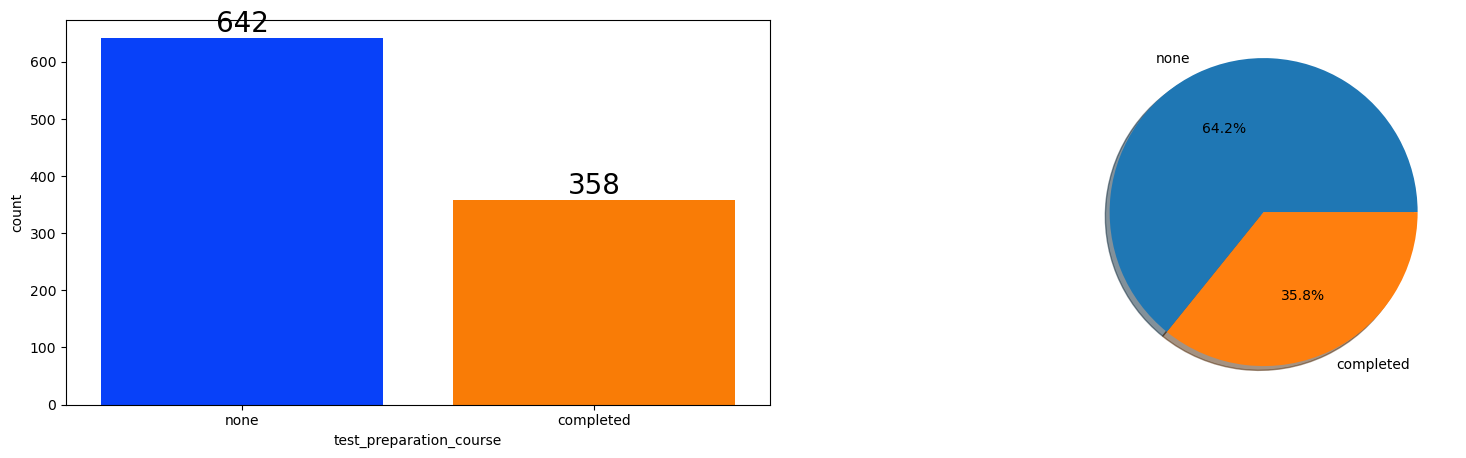

In [176]:
f, ax = plt.subplots(1, 2, figsize=[20, 5])
sns.countplot(x=df['test_preparation_course'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x = df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].unique(),autopct='%1.1f%%',shadow=True)
plt.show()

<b>Insights</b>

* More students opted for no test preparation course 

<b>Bivariate Analysis (How did test preparation course affect a students marks ?) </b>

In [178]:
group_data_5 = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean()
group_data_5

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


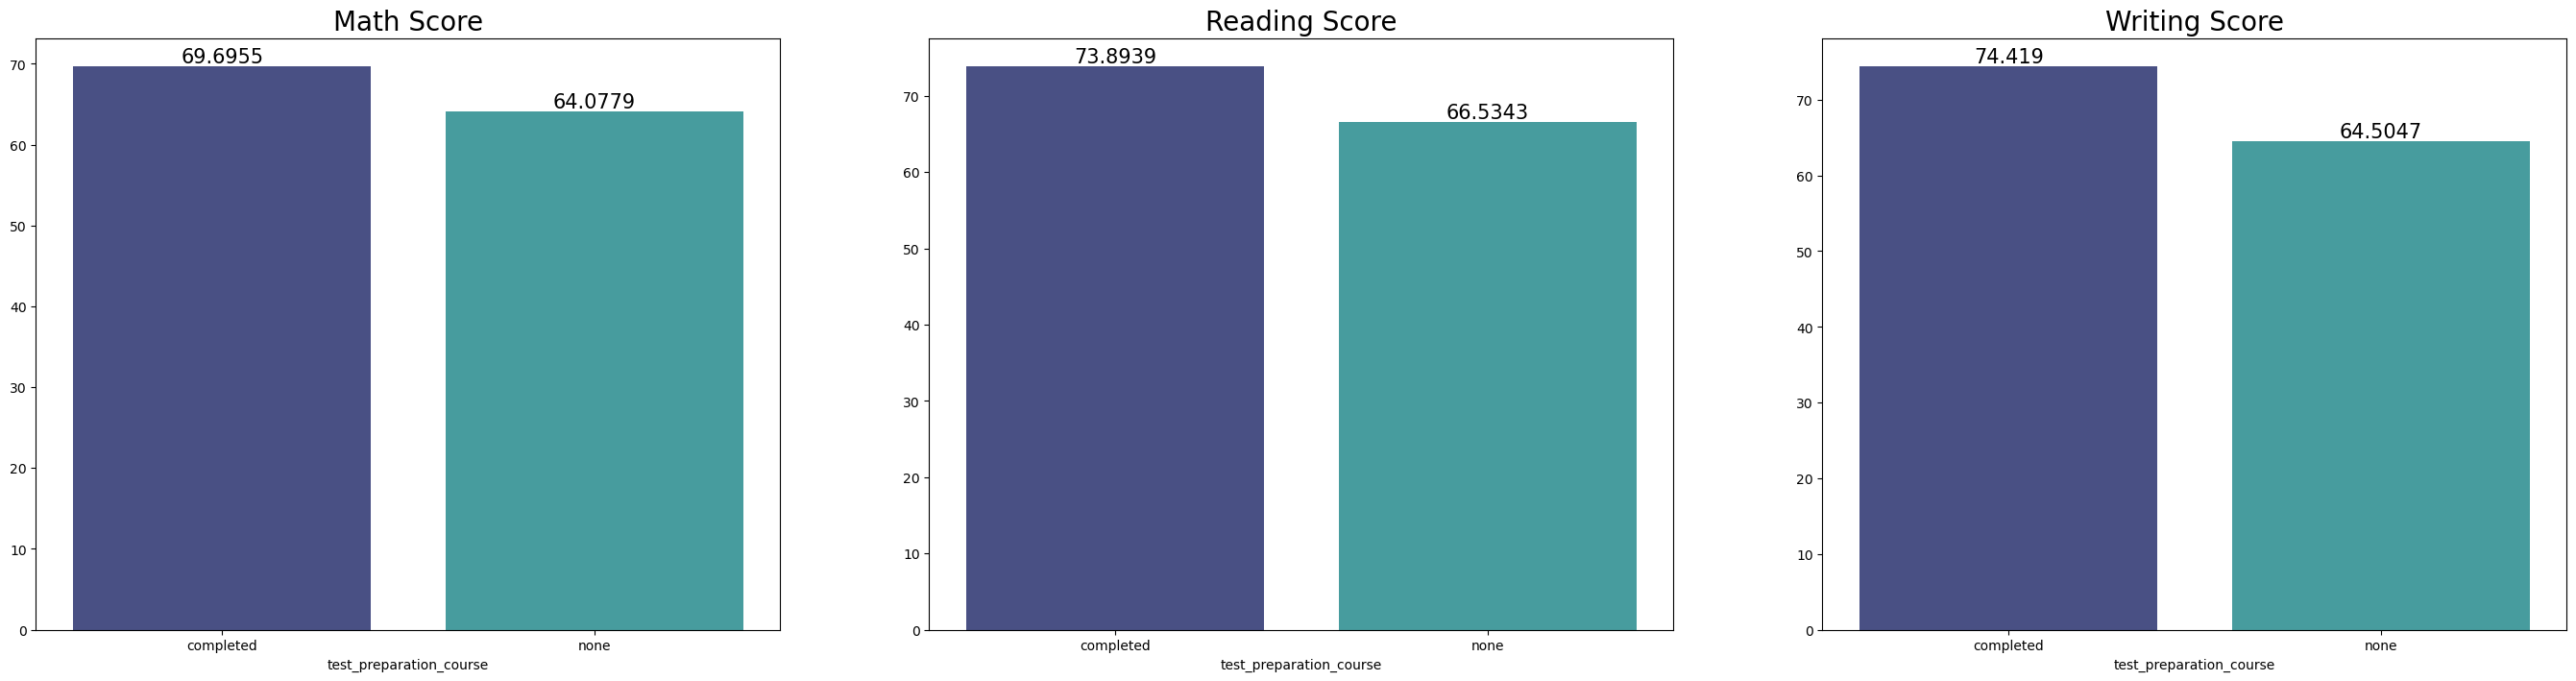

In [179]:
f, ax = plt.subplots(1, 3, figsize=[34, 8])

sns.barplot(x=group_data_5['math_score'].index,y=group_data_5['math_score'].values,palette = 'mako',ax=ax[0])
ax[0].set_title("Math Score", size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_5['reading_score'].index,y=group_data_5['reading_score'].values,palette = 'mako',ax=ax[1])
ax[1].set_title("Reading Score", size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data_5['writing_score'].index,y=group_data_5['writing_score'].values,palette = 'mako',ax=ax[2])
ax[2].set_title("Writing Score", size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)
plt.show()

<b>Insights</b>

* People who availed a test preparation course scored better marks across all subjects 

<b>4.4.6 Checking Outliers</b>

<Axes: >

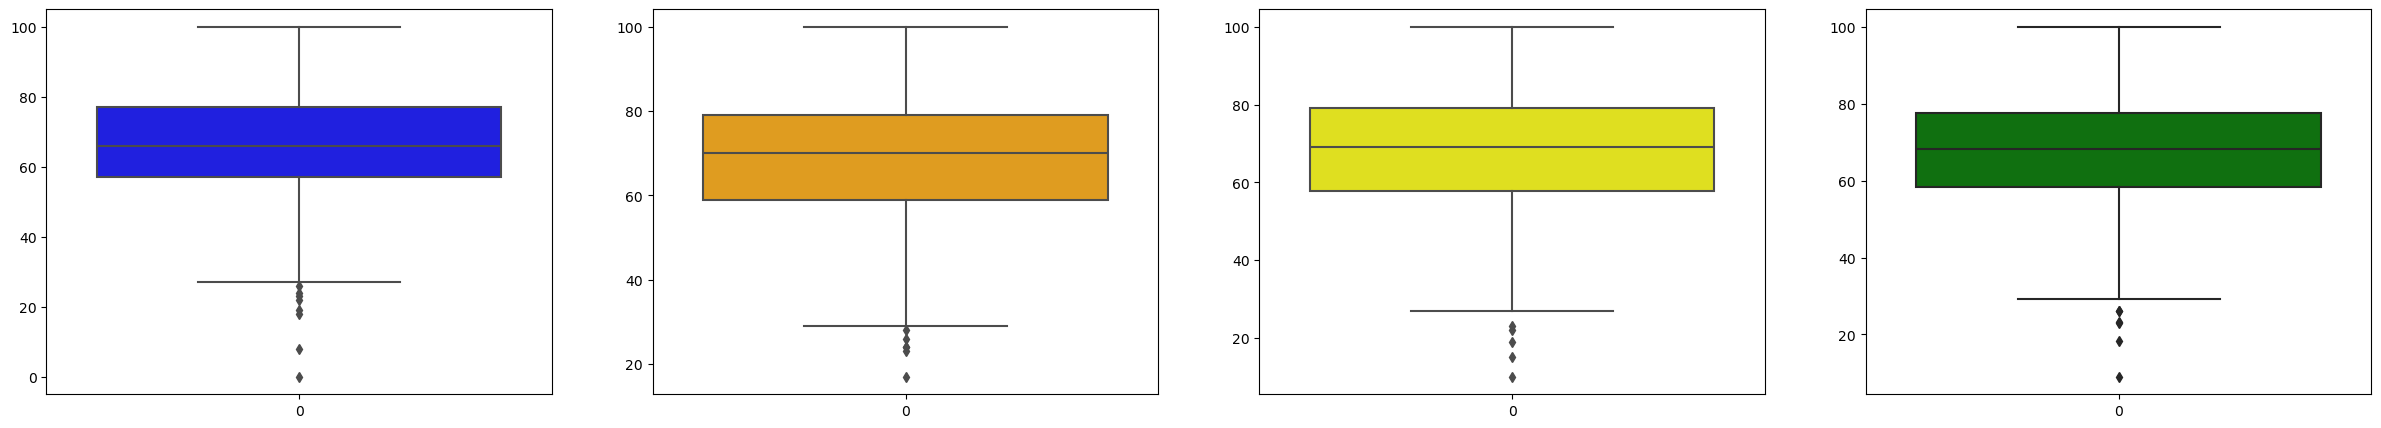

In [181]:
plt.subplots(1,4,figsize=[30, 5])
plt.subplot(1,4,1)
sns.boxplot(df['math_score'], color='blue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'], color='orange')
plt.subplot(1,4,3)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'], color='green')

<b>4.4.7 Multivariate analysis using Pairplot </b>

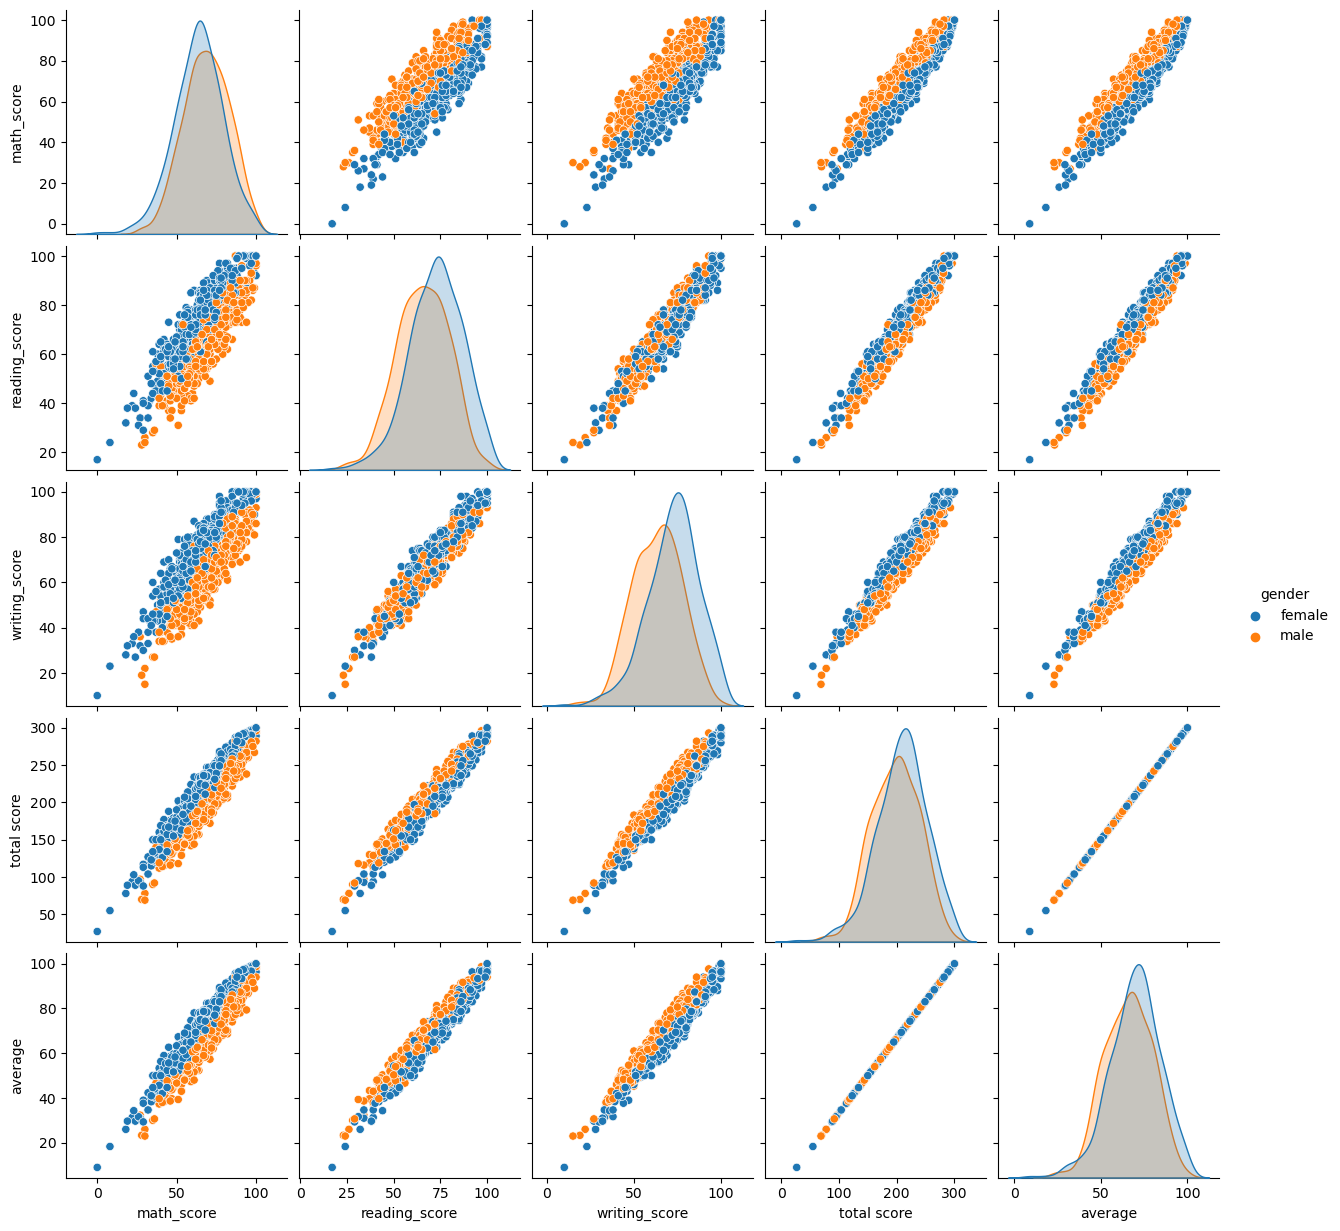

In [182]:
sns.pairplot(df, hue='gender')
plt.show()

<b>Insights</b>

* All the scores increase linearly with each other 

#### 5. Conclusions 

* Student's Performance is related with lunch, race-ethnicity and availing the test preparation course
* Females lead in pass percentage and also are top-scorers
* Finishing preparation course is benefitial.